## 시계열 평활기법(2)


1.   Holt 
2.   Holt-winters







In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# load time-series data
temp = pd.read_csv('/content/drive/My Drive/data/githublog/retail_sales.csv',header=0, infer_datetime_format=True, parse_dates=[0])
temp.head()

,DATE,Retail_Sales
0,1992-01-01,1744
1,1992-01-02,1990
2,1992-01-03,2177
3,1992-01-04,2601
4,1992-01-05,2171


#### simple data exploration

In [58]:
print('처음 날짜: ', min(temp['DATE']))
print('마지막 날짜 :', max(temp['DATE']))

처음 날짜:  1992-01-01 00:00:00
마지막 날짜 : 2020-01-04 00:00:00


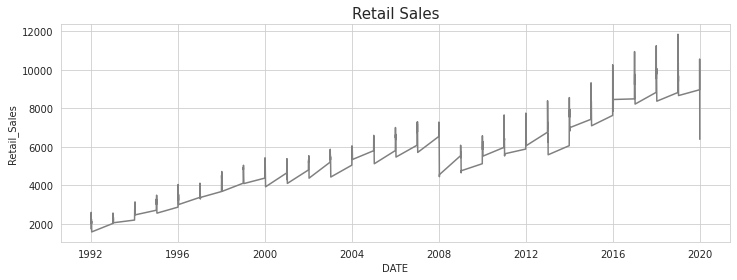

In [59]:
plt.figure(figsize=(12,4))
sns.set_style('whitegrid')
sns.lineplot(data=temp, x='DATE', y='Retail_Sales', color='grey')
plt.title('Retail Sales', fontsize=15);
plt.show()

In [60]:
# train test 나누기
train = temp[temp['DATE']<'2016-01-01']
test = temp[temp['DATE']>='2016-01-01']

print(train.shape)
print(test.shape)

(288, 2)
(52, 2)


### 1. Holt

In [61]:
# Holt
holt1 = Holt(train['Retail_Sales'],exponential=True).fit(smoothing_level=0.01)
holt2 = Holt(train['Retail_Sales'],exponential=True).fit(smoothing_level=0.2)
holt3 = Holt(train['Retail_Sales'],exponential=True).fit(smoothing_level=0.5)

In [62]:
train['holt_0.01'] = holt1.fittedvalues
train['holt_0.2'] = holt2.fittedvalues
train['holt_0.5'] = holt3.fittedvalues

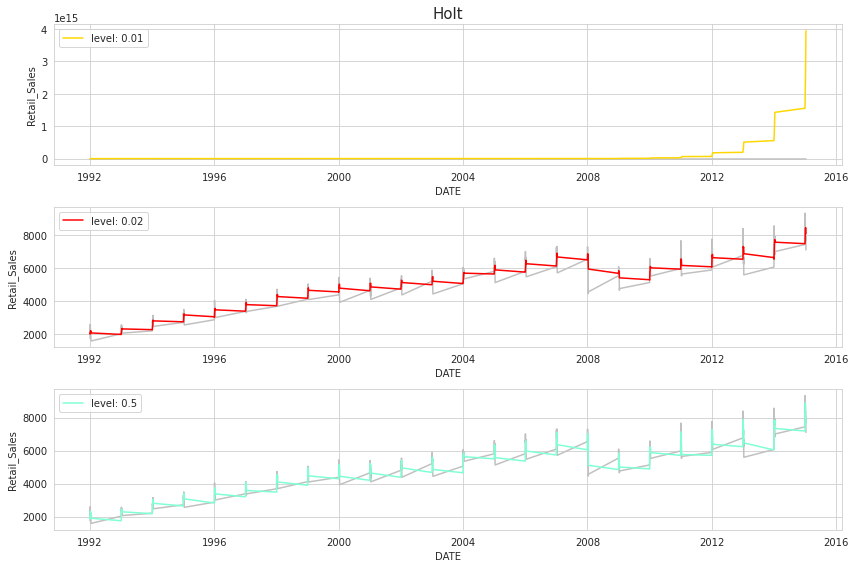

In [63]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')

plt.subplot(3,1,1)
sns.lineplot(data=train, x='DATE', y='Retail_Sales', color='silver')
sns.lineplot(data=train, x='DATE', y='holt_0.01', color='gold', label= 'level: 0.01')
plt.title('Holt', fontsize=15)

plt.subplot(3,1,2)
sns.lineplot(data=train, x='DATE', y='Retail_Sales', color='silver')
sns.lineplot(data=train, x='DATE', y='holt_0.2', color='red', label='level: 0.02')

plt.subplot(3,1,3)
sns.lineplot(data=train, x='DATE', y='Retail_Sales', color='silver')
sns.lineplot(data=train, x='DATE', y='holt_0.5', color='aquamarine', label='level: 0.5')

plt.tight_layout()
plt.show()

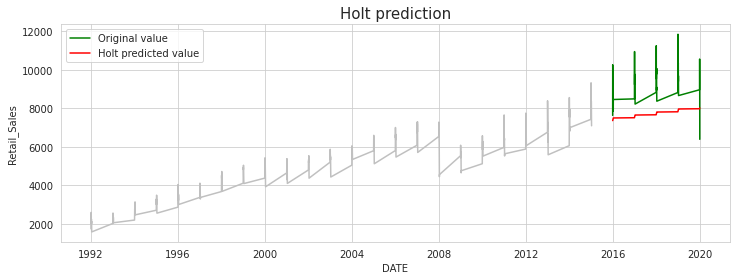

In [64]:
test['Holt'] = holt3.forecast(52).tolist()

plt.figure(figsize=(12,4))
sns.set_style('whitegrid')

sns.lineplot(data=train, x='DATE', y='Retail_Sales', color='silver')
sns.lineplot(data=test, x='DATE', y='Retail_Sales', color='green', label='Original value')
sns.lineplot(data=test, x='DATE', y='Holt', color='red', label= 'Holt predicted value')
plt.title('Holt prediction', fontsize=15)
plt.show()

### 2. Holt-winters

In [69]:
# Holt - winters
hw1 = ExponentialSmoothing(train['Retail_Sales'],seasonal_periods=12, seasonal= 'multiplicative', trend='add').fit()
hw2 = ExponentialSmoothing(train['Retail_Sales'],seasonal_periods=4, seasonal= 'multiplicative',trend='add').fit()

train['hw_montly'] = hw1.fittedvalues
train['hw_quarterly'] = hw2.fittedvalues

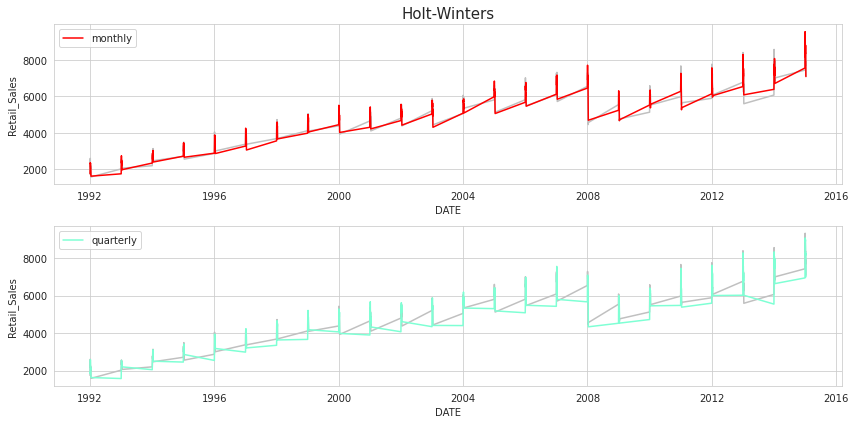

In [72]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

plt.subplot(2,1,1)
sns.lineplot(data=train, x='DATE', y='Retail_Sales', color='silver')
sns.lineplot(data=train, x='DATE', y='hw_montly', color='red', label= 'monthly')
plt.title('Holt-Winters', fontsize=15)


plt.subplot(2,1,2)
sns.lineplot(data=train, x='DATE', y='Retail_Sales', color='silver')
sns.lineplot(data=train, x='DATE', y='hw_quarterly', color='aquamarine', label='quarterly')

plt.tight_layout()
plt.show()

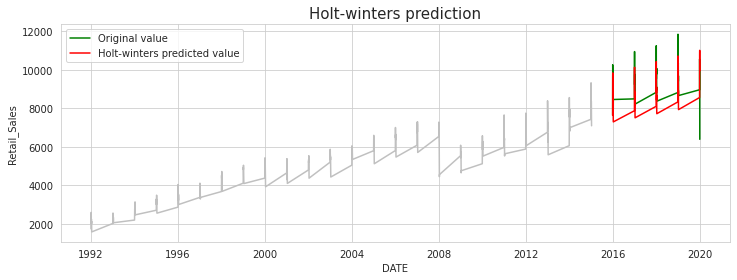

In [67]:
test['Holt-winters'] = hw1.forecast(52).tolist()

plt.figure(figsize=(12,4))
sns.set_style('whitegrid')

sns.lineplot(data=train, x='DATE', y='Retail_Sales', color='silver')
sns.lineplot(data=test, x='DATE', y='Retail_Sales', color='green', label='Original value')
sns.lineplot(data=test, x='DATE', y='Holt-winters', color='red', label= 'Holt-winters predicted value')
plt.title('Holt-winters prediction', fontsize=15)
plt.show()